# метод фильтрации признаков на основе дисперсии и его ролью в удалении признаков с низкой вариативностью
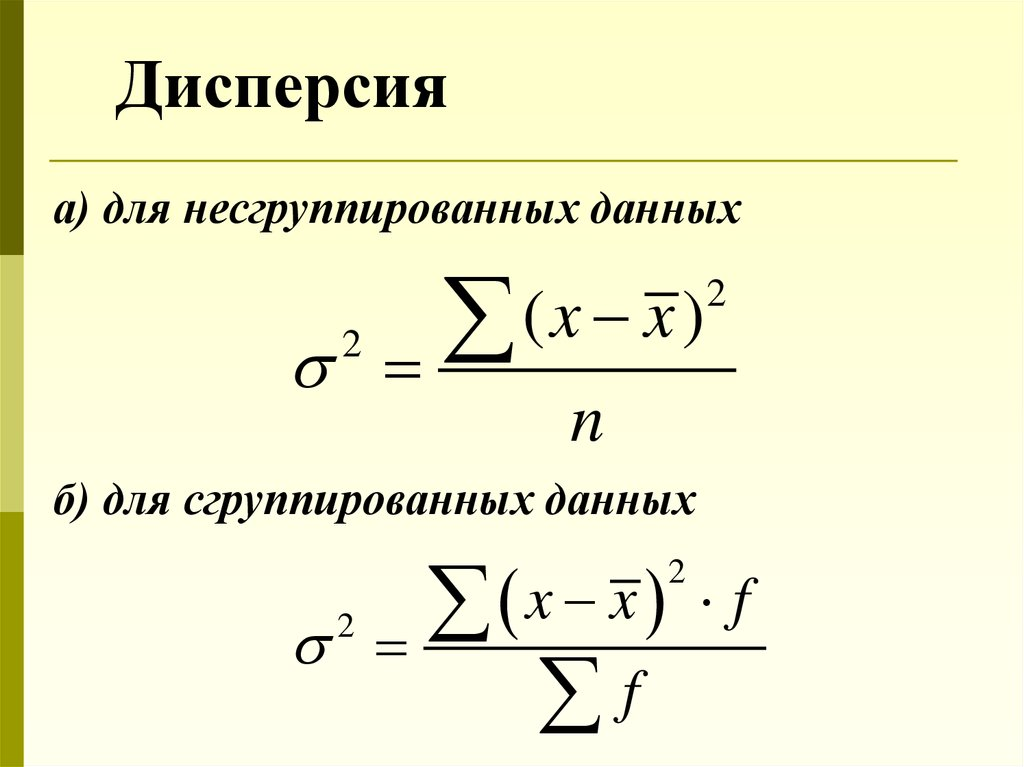

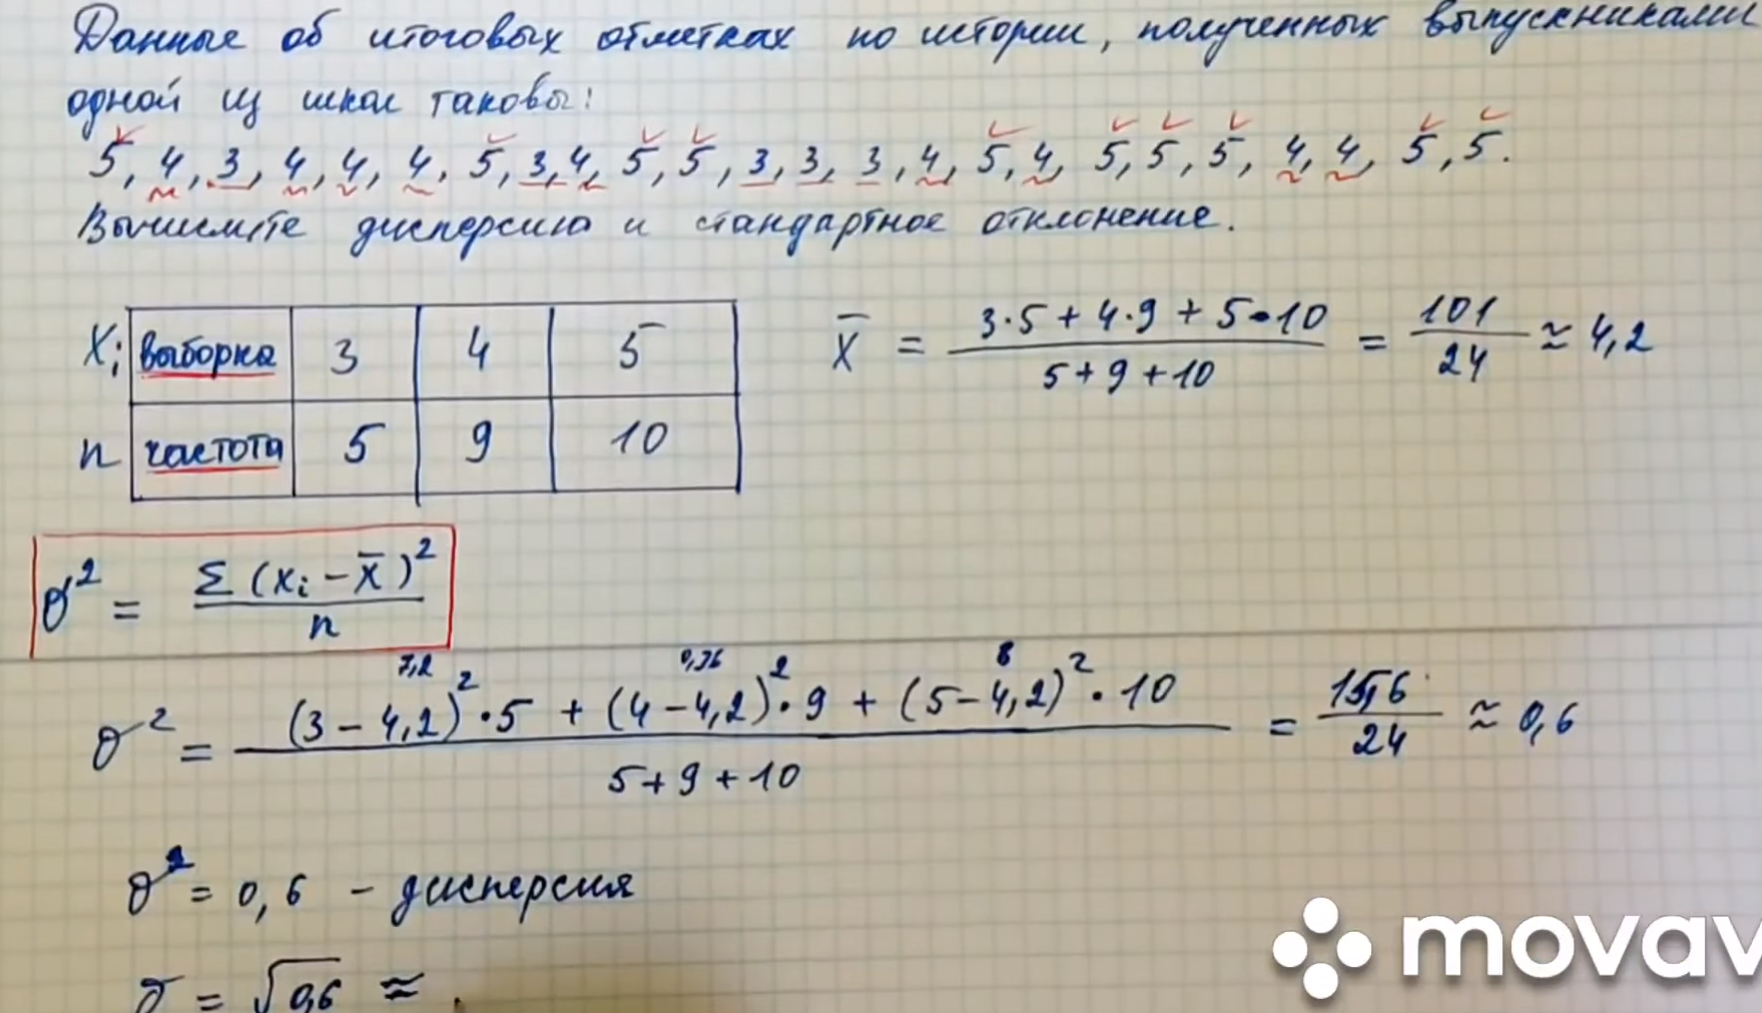

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
from sklearn.feature_selection import VarianceThreshold
# Инициализация модели фильтрации по дисперсии
threshold = 0.5 # пороговое значение для дисперсии
selector = VarianceThreshold(threshold)
# Применение фильтра к обучающему набору данных
X_train_filtered = selector.fit_transform(X_train)
print(X_train_filtered[1:5])

[[5.7 1.5 0.4]
 [6.7 4.4 1.4]
 [4.8 1.6 0.2]
 [4.4 1.3 0.2]]


Когда мы применяем VarianceThreshold к набору данных, она вычисляет дисперсию каждого признака и удаляет те признаки, у которых дисперсия ниже заданного порога. Это может быть полезно, когда мы хотим удалить признаки, которые имеют мало или нулевую изменчивость, так как они могут не нести полезной информации для модели.
1. Признаки с низкой дисперсией могут не нести полезной информации для модели машинного обучения. Удаление таких признаков может помочь улучшить производительность модели и уменьшить шум в данных.
2. Удаление признаков с низкой дисперсией может упростить модель и сделать ее более интерпретируемой. Модель будет фокусироваться на более важных признаках, которые имеют большую изменчивость.
3. Удаление признаков с низкой дисперсией может уменьшить размерность данных и ускорить вычисления в модели машинного обучения.

Метод fit_transform объединяет функциональность методов fit и transform. Этот метод используется для подгонки данных в модель и их преобразования в форму, более подходящую для модели, в один шаг. Это позволяет сэкономить время и усилия, которые обычно требуются для вызова fit и transform отдельно

120  Количество данных в выборке 0.2
120  Количество данных в выборке 0.5
120  Количество данных в выборке 0.6
120  Количество данных в выборке 0.9


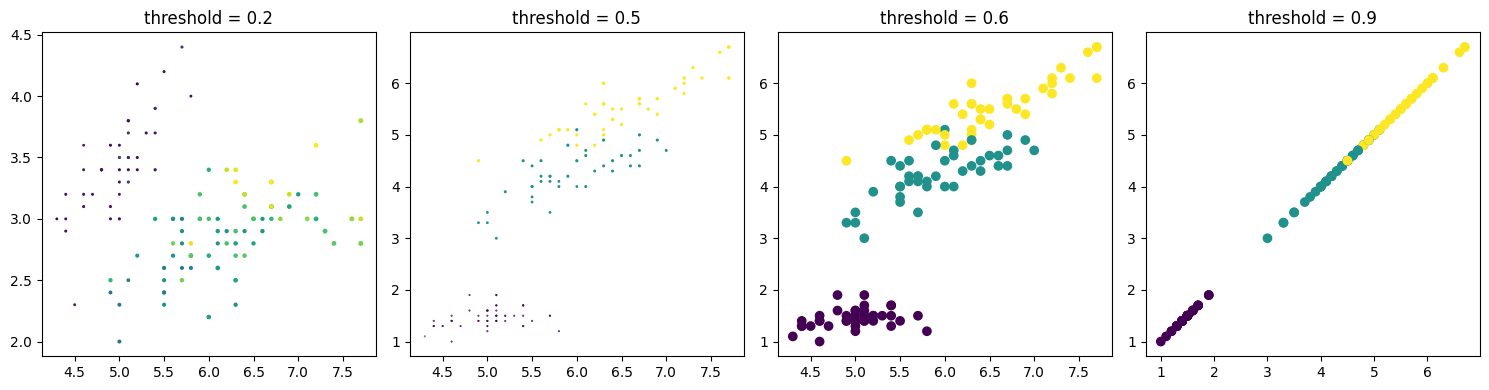

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(15, 4))

threshold = 0.2
selector = VarianceThreshold(threshold)
X_tresh02 = selector.fit_transform(X_train)
axs[0].scatter(X_tresh02[:, 0], X_tresh02[:, 1], X_tresh02[:, 2],c=X_tresh02[:, 3])
axs[0].set_title('threshold = 0.2')
print(len(X_tresh02),' Количество данных в выборке 0.2')

threshold = 0.5
selector = VarianceThreshold(threshold)
X_tresh05 = selector.fit_transform(X_train)
axs[1].scatter(X_tresh05[:, 0], X_tresh05[:, 1], X_tresh05[:, 2],c=y_train)
axs[1].set_title('threshold = 0.5')
print(len(X_tresh05),' Количество данных в выборке 0.5')

threshold = 0.6
selector = VarianceThreshold(threshold)
X_tresh06 = selector.fit_transform(X_train)
axs[2].scatter(X_tresh06[:, 0], X_tresh06[:, 1], c=y_train)
axs[2].set_title('threshold = 0.6')
print(len(X_tresh06),' Количество данных в выборке 0.6')

threshold = 0.9
selector = VarianceThreshold(threshold)
X_tresh09 = selector.fit_transform(X_train)
axs[3].scatter(X_tresh09[:, 0], X_tresh09[:, 0], c=y_train)
axs[3].set_title('threshold = 0.9')
print(len(X_tresh09),' Количество данных в выборке 0.9')

plt.tight_layout()
plt.show()

грубо говоря значение threshold может удалять однин из признаков, тем самым уменьшая размерность данных

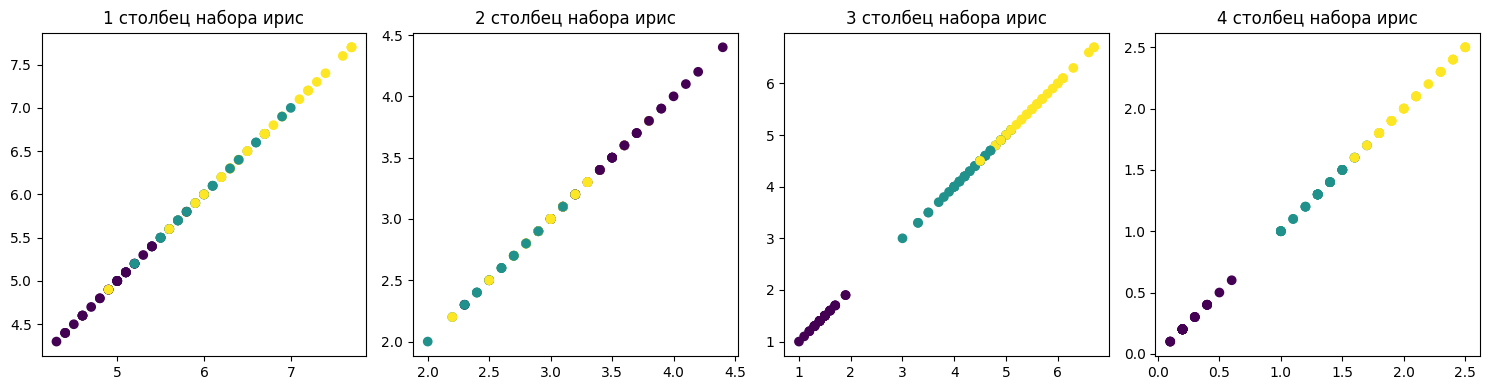

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].scatter(X_train[:, 0], X_train[:, 0], c=y_train)
axs[0].set_title('1 столбец набора ирис')

axs[1].scatter(X_train[:, 1], X_train[:, 1], c=y_train)
axs[1].set_title('2 столбец набора ирис')

axs[2].scatter(X_train[:, 2], X_train[:, 2], c=y_train)
axs[2].set_title('3 столбец набора ирис')

axs[3].scatter(X_train[:, 3], X_train[:, 3], c=y_train)
axs[3].set_title('4 столбец набора ирис')

plt.tight_layout()
plt.show()

# метод обработки высококоррелированных признаков, такой как матрица корреляции и метод выбора наиболее информативных признаков.

Матрица корреляции - это таблица, которая показывает степень линейной зависимости между парами признаков в наборе данных. Она представляет собой квадратную матрицу, где каждый элемент показывает коэффициент корреляции между двумя признаками. Коэффициент корреляции может принимать значения от -1 до 1, где 1 означает положительную линейную зависимость, -1 - отрицательную линейную зависимость, а 0 - отсутствие линейной зависимости.

Матрица корреляции полезна для выявления высококоррелированных признаков. Если два или более признака имеют высокий коэффициент корреляции, это может указывать на то, что они содержат похожую информацию и могут быть избыточными для модели. В таких случаях можно принять решение об удалении одного из признаков или использовании методов для выбора наиболее информативных признаков

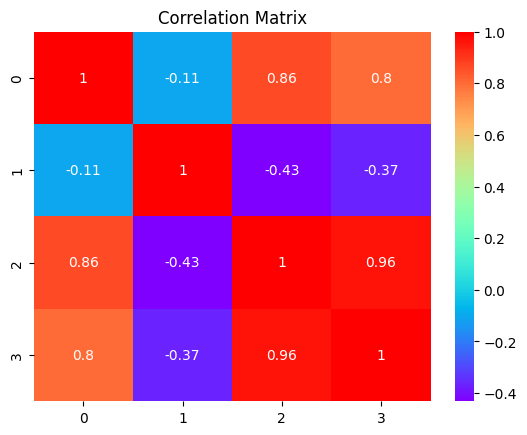

7


In [5]:
import pandas as pd

# Рассчет матрицы корреляции признаков
X_trainp = pd.DataFrame(X_train)
correlation_matrix = X_trainp.corr()

# Визуализация матрицы корреляции
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow')
plt.title('Correlation Matrix')
plt.show()

# Выбор наиболее информативных признаков
n_features = 23
selected_features = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(n_features)
print(len(selected_features))

In [6]:
selected_features.index
# при 1 первая строка, при n = 2 будет 2 первые строки и т.д
# при n > 7 вывод одинаковый

MultiIndex([(0, 0),
            (2, 3),
            (0, 2),
            (0, 3),
            (1, 2),
            (1, 3),
            (0, 1)],
           )

In [7]:
correlation_matrix[correlation_matrix > 0].index # почему 4?

RangeIndex(start=0, stop=4, step=1)

In [8]:
selected_features121 = selected_features.index

print(selected_features121)

MultiIndex([(0, 0),
            (2, 3),
            (0, 2),
            (0, 3),
            (1, 2),
            (1, 3),
            (0, 1)],
           )


correlation_matrix range index, selected_features121 multiindex. не читает selected_features.index вне зависимости от коэф и т.д

# Примените оба метода к набору данных для удаления признаков с низкой вариативностью и высококоррелированных признаков.

Исходный: 120 [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]] 
 test: 30 [[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]]
Дисперсия: 120 [[1. ]
 [1.5]] 
 test: 30 [[4.7]
 [1.7]]
Метод для удаления признаков с низкой вариативностью: 4 [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]] 
 test: 4 [[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]]


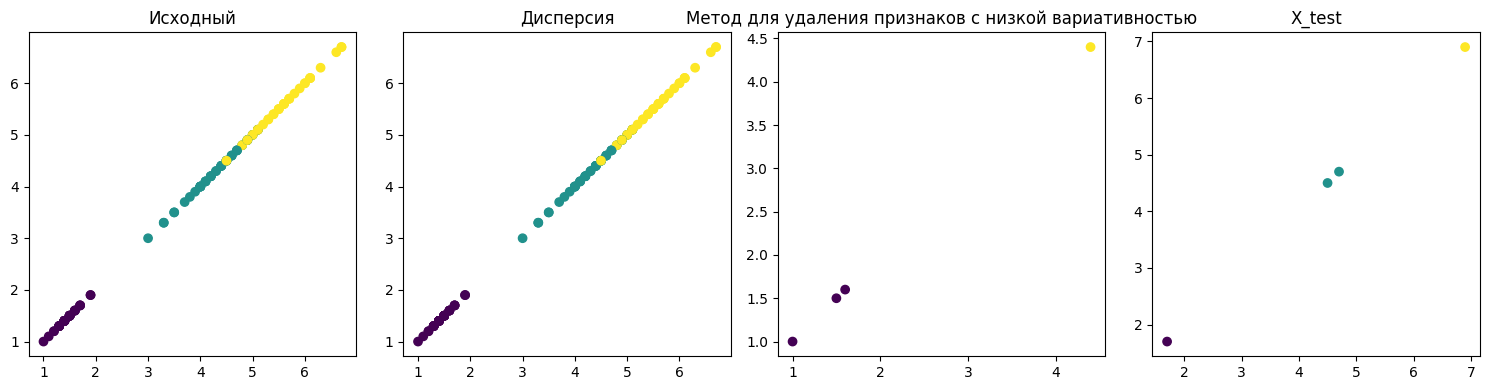

In [9]:
# Применение фильтрации по дисперсии к обучающему и тестовому набору данных
X_train_filtered = selector.transform(X_train)
X_test_filtered = selector.transform(X_test)

# Применение выбора наиболее информативных признаков к обучающему и тестовому набору данных
X_train_selected = X_train[correlation_matrix[correlation_matrix == 1].index]
X_test_selected = X_test[correlation_matrix[correlation_matrix == 1].index]


print('Исходный:',len(X_train),X_train[:2],'\n test:',len(X_test),X_test[:2])
print('Дисперсия:',len(X_train_filtered),X_train_filtered[:2],'\n test:',len(X_test_filtered),X_test_filtered[:2])
print('Метод для удаления признаков с низкой вариативностью:',len(X_train_selected),X_train_selected[:5],'\n test:',len(X_test_selected),X_test_selected[:5])

fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].scatter(X_train[:, 2], X_train[:, 2], c=y_train)
axs[0].set_title('Исходный')

axs[1].scatter(X_train_filtered[:, 0], X_train_filtered[:, 0], c=y_train)
axs[1].set_title('Дисперсия')

axs[2].scatter(X_train_selected[:, 2], X_train_selected[:, 2], c=[0,0,1,0])
axs[2].set_title('Метод для удаления признаков с низкой вариативностью')

axs[3].scatter(X_test_selected[:, 2], X_test_selected[:, 2], c=[1,0,2,1])
axs[3].set_title('X_test')


plt.tight_layout()
plt.show()

Плохие данные в тренировочной выборке могли появится из-за идентичности данных в выборке. Либо данные не переобученны т.к регуляризация применяется к переобученным моделям

# Обучение модели машинного обучения на отфильтрованных признаках

In [10]:
from sklearn.linear_model import LogisticRegression

# Инициализация и обучение модели машинного обучения на отфильтрованных признаках
model = LogisticRegression()
model.fit(X_train_filtered, y_train)

# Оценка производительности модели
accuracy = model.score(X_test_filtered, y_test)
accuracy

1.0

# 1. Реализуйте методы обработки высококоррелированных признаков, такие как PCA или Lasso регрессия.

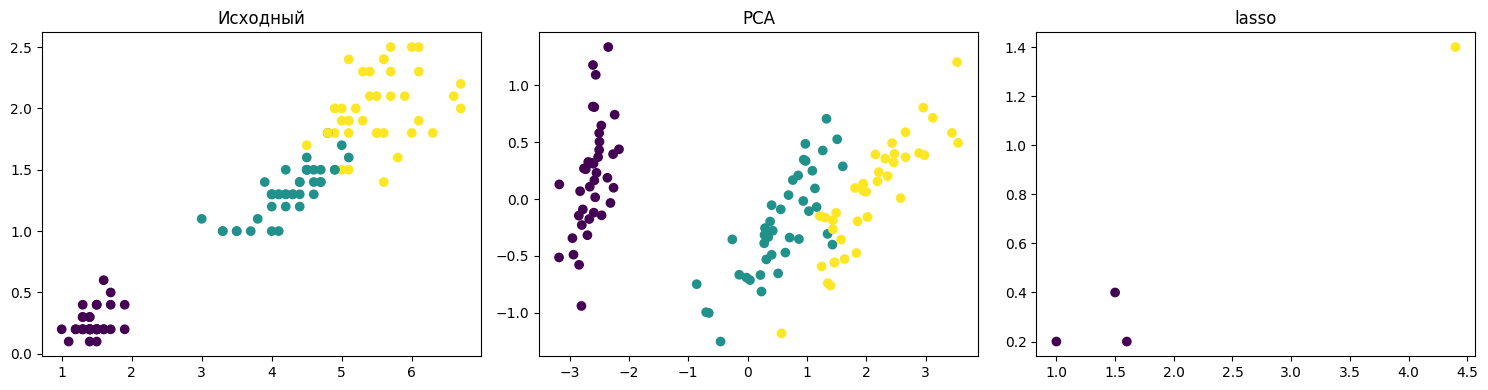

In [11]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso

# Пример применения PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Пример применения Lasso регрессии
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
feature_weights = lasso.coef_
selected_features2 = X_trainp.columns[feature_weights != 0]
# Применение отобранных признаков к тренировочным и тестовым данным
X_train_selected = X_train[selected_features2]
X_test_selected = X_test[selected_features2]

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(X_train[:, 2], X_train[:, 3], c=y_train)
axs[0].set_title('Исходный')

axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
axs[1].set_title('PCA')

axs[2].scatter(X_train_selected[:, 2],X_train_selected[:, 3], c=[0,0,1,0])
axs[2].set_title('lasso')


plt.tight_layout()
plt.show()

Нужно учитывать что в исходном, мы взяли 3 и 4 столбец таблицы ирис из опыта.

 Метод PCA считает дисперсию, в процессе PCA вычисляется ковариационная матрица, которая показывает степень корреляции между признаками. Собственные значения этой ковариационной матрицы представляют собой дисперсии, объясняемые каждой компонентой PCA.

 Заметим! поменялось пространство признаков. OX [-3,5;3,5]

Lasso регрессия используется для регуляризации модели линейной регрессии и отбора признаков. Lasso регрессия добавляет штраф L1 к сумме квадратов ошибок, что приводит к разреживанию весов признаков. В результате, Lasso регрессия может автоматически отобрать наиболее информативные признаки и уменьшить влияние высококоррелированных признаков на модель.

в нашем примере метод lasso отработал идентично методу для удаления признаков с низкой вариативностью

# 2. Исследуйте влияние порогового значения на количество отфильтрованных признаков и производительность модели

При более высоком пороговом значении будет отфильтровано больше признаков, в то время как при более низком пороговом значении будет отфильтровано меньше признаков. Изменение количества отфильтрованных признаков может иметь влияние на производительность модели.

<ipython-input-46-52447b0dd371>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.946e+00, tolerance: 7.899e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-46-52447b0dd371>:14: UserWar

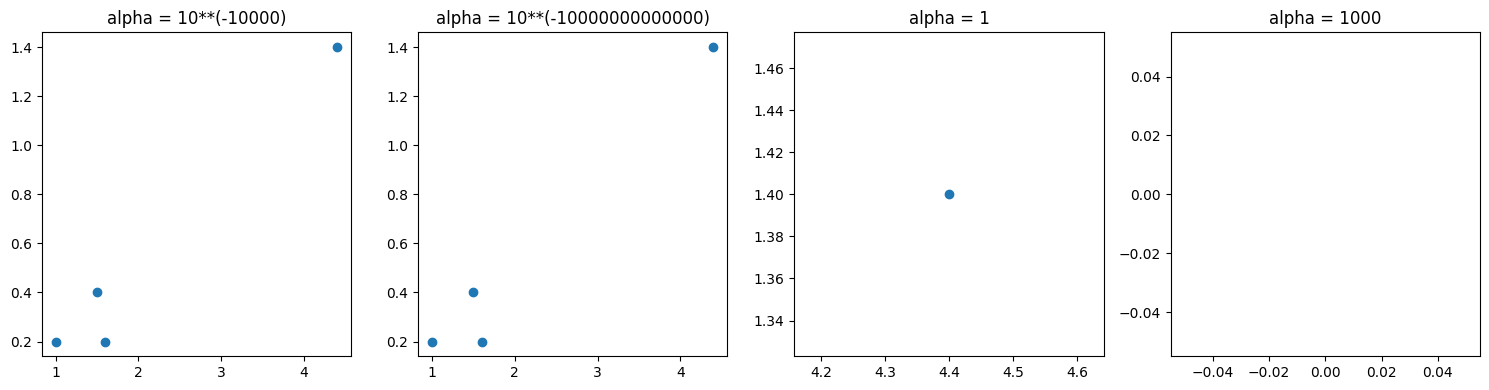

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(15, 4))

lasso = Lasso(alpha=10**(-10000))
lasso.fit(X_train, y_train)
feature_weights = lasso.coef_
selected_features2 = X_trainp.columns[feature_weights != 0]
X_train_selected = X_train[selected_features2]
axs[0].scatter(X_train_selected[:, 2], X_train_selected[:, 3])
axs[0].set_title('alpha = 10**(-10000)')

lasso = Lasso(alpha=10**(-10000000000000))
lasso.fit(X_train, y_train)
feature_weights = lasso.coef_
selected_features2 = X_trainp.columns[feature_weights != 0]
X_train_selected = X_train[selected_features2]
axs[1].scatter(X_train_selected[:, 2], X_train_selected[:, 3])
axs[1].set_title('alpha = 10**(-10000000000000)')

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
feature_weights = lasso.coef_
selected_features2 = X_trainp.columns[feature_weights != 0]
X_train_selected = X_train[selected_features2]
axs[2].scatter(X_train_selected[:, 2], X_train_selected[:, 3])
axs[2].set_title('alpha = 1')

lasso = Lasso(alpha=1000)
lasso.fit(X_train, y_train)
feature_weights = lasso.coef_
selected_features2 = X_trainp.columns[feature_weights != 0]
X_train_selected = X_train[selected_features2]
axs[3].scatter(X_train_selected[:, 2], X_train_selected[:, 3])
axs[3].set_title('alpha = 1000')

plt.tight_layout()
plt.show()